In [65]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

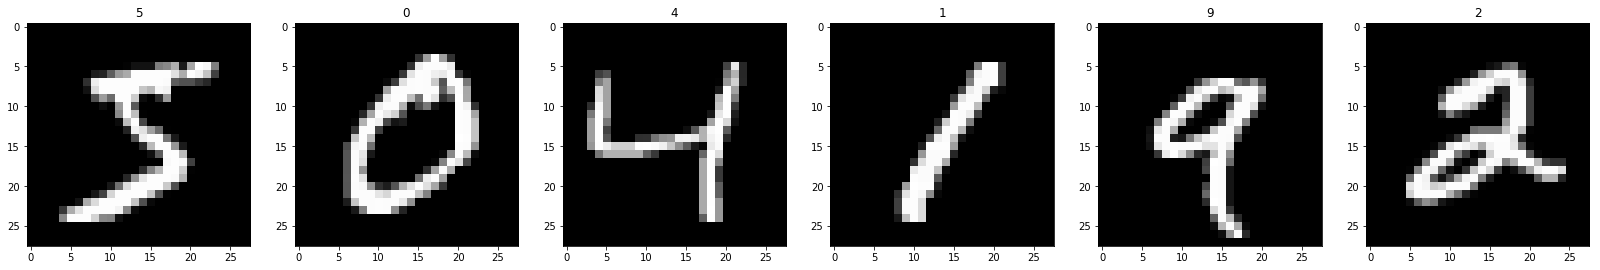

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# visualizing the data
figure = plt.figure(figsize=(28,28))
for i in range(6):
    ax = figure.add_subplot(1,6,i+1)
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [38]:
#normalizing the features so that each pixel has a value between 0 and 1

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [39]:
print('Integer labels:', y_train[0:5])

Integer labels: [5 0 4 1 9]


In [40]:
#one hot encoding the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print('One hot encoded labels', y_train[0:5])

One hot encoded labels [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [52]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:])) #flatten image to a row vector
model.add(Dense(512)) #add 1st hidden layer with 512 nodes
model.add(Dropout(0.3)) #add a dropout so that each node has a probability=0.4 of being dropped
model.add(Activation('relu')) #activation of 1st hidden layer is relu
model.add(Dense(512)) #add 2nd hidden layer with 512 nodes
model.add(Dropout(0.3)) #add a dropout so that each node has a probability=0.4 of being dropped
model.add(Activation('relu')) #activation of 2nd hidden layer is rely
model.add(Dense(10)) #add output layer with 10 nodes
model.add(Activation('softmax')) #activation of output layer is softmax to give us probability that image belongs to certain class

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_26 (Activation)   (None, 512)               0         
__________

In [72]:
#compiling the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [73]:
#evaluating the model on arbitrary weights
score = model.evaluate(X_test, y_test, verbose=2)
accuracy=score[1]*100 #score[0] returns loss value, score[1] returns metrics value which is accuracy in this case
print('Test score=%.4f' %accuracy)

Test score=97.9900


In [74]:
#make a check point for model to save weights 
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only = True)
#fit the model and pass it the checkpointer
model.fit(X_train, y_train, batch_size = 150, epochs = 10, validation_split=0.2, callbacks=[checkpointer], verbose=2,
         shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.0290 - acc: 0.9911 - val_loss: 0.0808 - val_acc: 0.9811

Epoch 00001: val_loss improved from inf to 0.08082, saving model to mnist.model.best.hdf5
Epoch 2/10
 - 6s - loss: 0.0252 - acc: 0.9921 - val_loss: 0.0790 - val_acc: 0.9817

Epoch 00002: val_loss improved from 0.08082 to 0.07896, saving model to mnist.model.best.hdf5
Epoch 3/10
 - 6s - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0785 - val_acc: 0.9814

Epoch 00003: val_loss improved from 0.07896 to 0.07849, saving model to mnist.model.best.hdf5
Epoch 4/10
 - 6s - loss: 0.0211 - acc: 0.9937 - val_loss: 0.0786 - val_acc: 0.9818

Epoch 00004: val_loss did not improve from 0.07849
Epoch 5/10
 - 6s - loss: 0.0208 - acc: 0.9936 - val_loss: 0.0783 - val_acc: 0.9816

Epoch 00005: val_loss improved from 0.07849 to 0.07831, saving model to mnist.model.best.hdf5
Epoch 6/10
 - 5s - loss: 0.0208 - acc: 0.9935 - val_loss: 0.0785 - val_acc: 0.9817

Epoch 00006: val_loss d

In [75]:
#loading the weights that got the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [76]:
#evaluating the model on the testing set
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = score[1]*100
print('Accuracy of testing set: %.4f' %accuracy)

10000/10000 [==============================] - 1s 119us/step
Accuracy of testing set: 98.4800
